<a href="https://colab.research.google.com/github/rhmdftrianto/DATMIN/blob/main/027_Rahmad_Fitrianto_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**JUDUL DAN ALGORITMA**


#**SUPERVISED | IRIS SPECIES**

**ALGORITMA : LOGISTIC REGRESSION**

In [38]:
# Dataset google drive
link2 = "https://drive.google.com/file/d/1FZovBwRnfndmf1DdLfBJJQQZm9Rg8YPu/view?usp=share_link"

# Diubah jadi bentuk seperti ini
link_supervised= "https://drive.google.com/uc?id=1FZovBwRnfndmf1DdLfBJJQQZm9Rg8YPu"

In [39]:
# Untuk mengimport (mengakses) modul
# Untuk Tabulasi dan analisis
import pandas as pd

# Untuk perhitungan 
import numpy as np

# Untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##**DATA UNDERSTANDING**

###**Collect Initial Data**

  Dataset Iris Species didapakan dari situs (website) resmi kaggle (sumber-data)

  Link Dataset : https://www.kaggle.com/datasets/uciml/iris

  Kemudian dataset ini diekspor ke G-Drive agar lebih mudah digunakan

  Link G-Drive Dataset : https://drive.google.com/uc?id=1A5gBTYJQ4KXptdsFh79EOByJhyEa0-8K

In [40]:
# Collect Initial Data
df_sup = pd.read_csv(link_supervised)

In [41]:
# Menghapus Kolom ID (Karena tidak dibutuhkan)
df_sup.drop('Id', axis=1, inplace=True)

###**Describe Data**

Dataset yang digunakan memiliki 150 baris data pada UCI Machine Learning Database, yang tersusun dalam 5 kolom.

  Deskripsi dari 4 Kolom tersebut yaitu:
  1. Sepal Length (Panjang Kelopak): mengukur panjang kelopak bunga iris dari pangkal hingga ujung, diukur dalam sentimeter. Kelopak adalah bagian luar bunga yang menutupi dan melindungi bunga saat masih muda. Panjang kelopak dapat memberikan informasi tentang ukuran bunga secara keseluruhan.
  
  2. Sepal Width (Lebar Kelopak): mengukur lebar kelopak bunga iris pada bagian terlebar, diukur dalam sentimeter. Lebar kelopak dapat memberikan informasi tentang bentuk dan ukuran bunga secara keseluruhan.
 
  3. Petal Length (Panjang Mahkota): mengukur panjang mahkota bunga iris dari pangkal hingga ujung, diukur dalam sentimeter. Mahkota adalah bagian bunga yang lebih jelas dan biasanya lebih menarik secara visual daripada kelopak. Panjang mahkota dapat memberikan informasi tentang karakteristik bunga, seperti tinggi dan bentuk mahkota.
  4. Petal Width (Lebar Mahkota): mengukur lebar mahkota bunga iris pada bagian terlebar, diukur dalam sentimeter. Lebar mahkota dapat memberikan informasi tentang bagaimana mahkota bunga iris menjalar dan membuka pada ujungnya. Fitur ini juga dapat memberikan informasi tentang ukuran dan bentuk mahkota secara keseluruhan.
  5. Species : mengelompokan bunga iris berdasarkan 3 kelompok yaitu iris-setosa, Iris-versicolor, iris-virginica


In [42]:
# Menampilkan dataset
df_sup

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
# Menampilkan 5 baris pertama
df_sup.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# Menampilkan jumlah baris data (record data), dan jumlah kolom
# Terdapat 150 baris data (record data), 5 kolom pada data ini
df_sup.shape

(150, 5)

In [45]:
# Menampilkan deskriptif statistik data
df_sup.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Explore Data**

####**Univariate Analysis**

Analisis ini dilakukan pada setiap variabel secara individual.

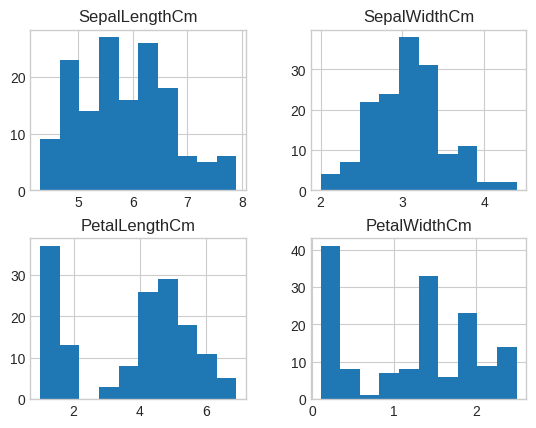

In [46]:
# Membuat histogram untuk melihat distribusi nilai pada setiap kolom
df_sup.hist(bins=10)
plt.show()

Menampilkan distribusi nilai pada setiap kolom, dengan jumlah bin sebanyak 10. Dapat dilihat bahwa sepal_length dan sepal_width cenderung normal, sedangkan petal_length dan petal_width memiliki beberapa puncak yang mengindikasikan adanya beberapa kelompok nilai yang berbeda.

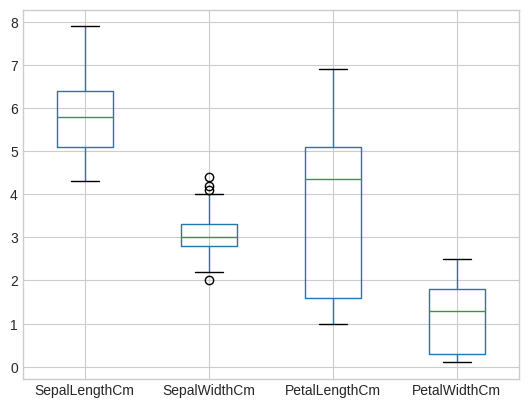

In [47]:
# Membuat boxplot untuk melihat persebaran nilai pada setiap kolom
df_sup.boxplot()
plt.show()

Menampilkan persebaran nilai pada setiap kolom, dengan garis tengah menunjukkan median dan kotak menunjukkan kuartil 1 dan 3. Dapat dilihat bahwa sepal_length dan sepal_width memiliki persebaran nilai yang cukup homogen, sedangkan petal_length dan petal_width memiliki nilai yang lebih bervariasi.

####**Bivariate Analysis**

Analisis ini dilakukan pada dua variabel secara bersamaan untuk melihat hubungan antara keduanya.

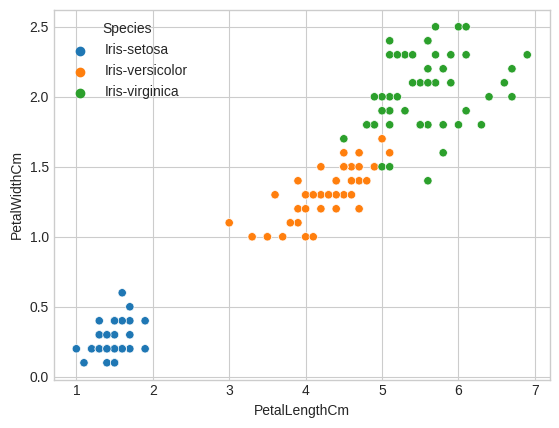

In [48]:
# Membuat scatterplot untuk melihat hubungan antara petal_length dan petal_width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df_sup)
plt.show()

Menampilkan hubungan antara petal_length dan petal_width dalam bentuk scatterplot, dengan warna yang berbeda untuk setiap species. Dapat dilihat bahwa petal_length dan petal_width memiliki hubungan yang sangat kuat dan membedakan species dengan jelas.

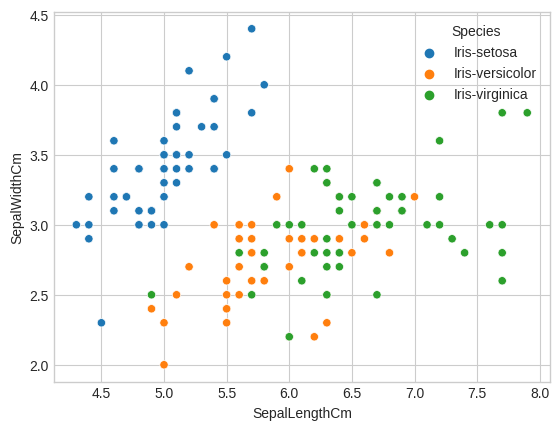

In [49]:
# Membuat scatterplot untuk melihat hubungan antara sepal_length dan sepal_width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df_sup)
plt.show()

Menampilkan hubungan antara sepal_length dan sepal_width dalam bentuk scatterplot, dengan warna yang berbeda untuk setiap species. Dapat dilihat bahwa sepal_length dan sepal_width memiliki hubungan yang kurang jelas dan tidak terlalu membedakan species dengan jelas.

####**Multivariate Analysis**

Analisis ini dilakukan pada tiga atau lebih variabel untuk melihat interaksi antar variabel dan bagaimana variabel-variabel tersebut mempengaruhi satu sama lain.

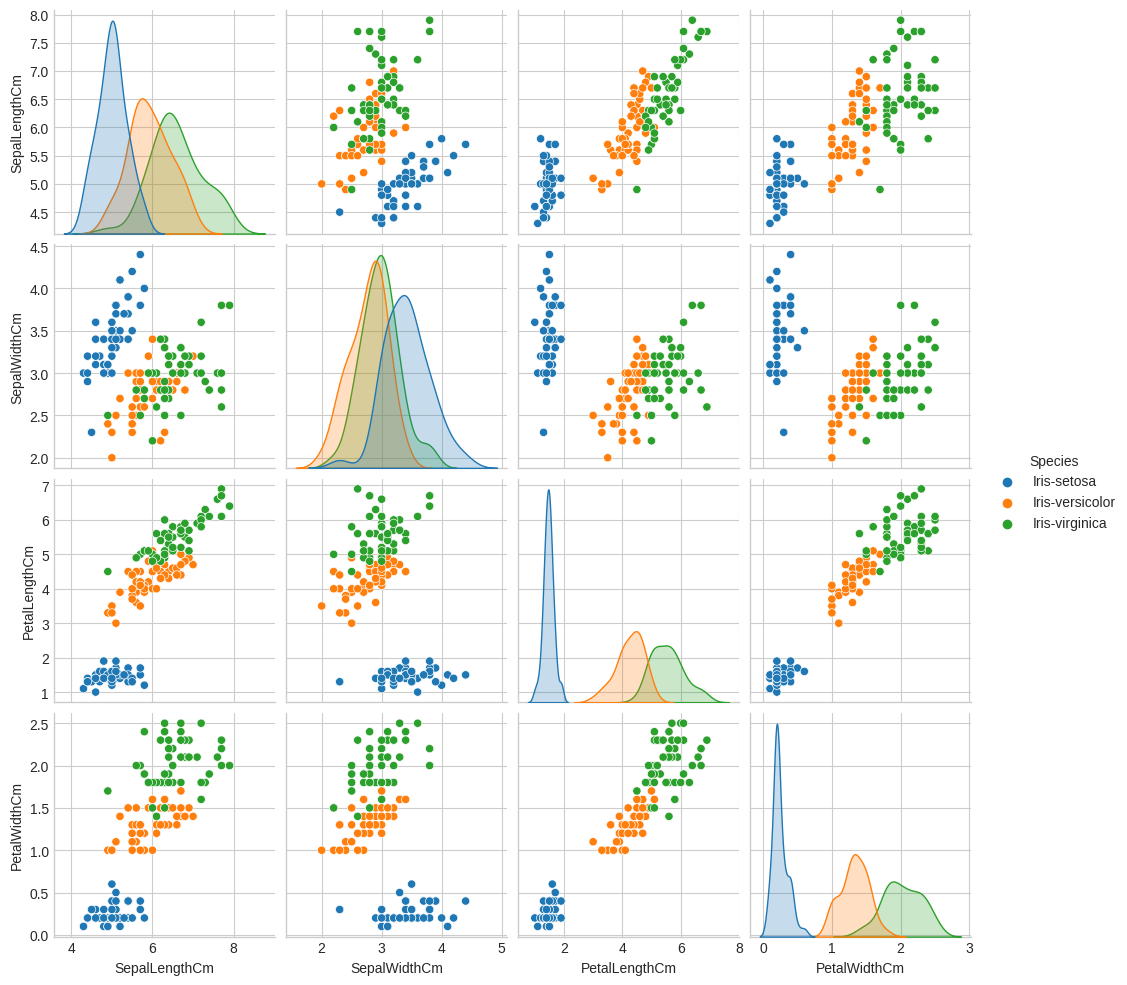

In [50]:
# Membuat pairplot untuk melihat hubungan antar variabel
sns.pairplot(df_sup, hue='Species')
plt.show()

Menampilkan hubungan antar variabel dalam bentuk scatterplot dan histogram, dengan warna yang berbeda untuk setiap species (jenis bunga iris). Dapat dilihat bahwa petal_length dan petal_width memiliki hubungan yang kuat dan berbeda untuk setiap species, sedangkan sepal_length dan sepal_width tidak terlalu membedakan species dengan jelas.

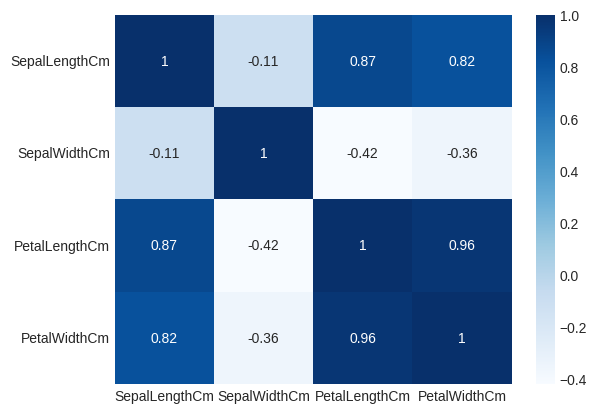

In [66]:
# Membuat heatmap untuk melihat korelasi antar kolom
corr_matrix = df_sup.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Menampilkan korelasi antar kolom dengan warna yang mengindikasikan kekuatan korelasinya. Dapat dilihat bahwa sepal_length dan sepal_width memiliki korelasi yang rendah, sedangkan petal_length dan petal_width memiliki korelasi yang sangat kuat.

##**DATA PREPARATION**

### **Select Data**

  Data utama yang digunakan bersumber dari tabel Iris.csv

### **Clean Data**
  1. Data Type
  2. Missing Value
  3. Handling Duplicate Data





  1. **Data Type**

In [52]:
#  Menampilkan dataset unsupervised
df_sup

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
# Menampilkan informasi detail tentang dataset
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
# Menampilkan informasi type data yang digunakan pada kolom dataset
df_sup.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Dapat dilihat diatas terdapat summary yang berisi rata-rata, standar deviasi, nilai max dan niali min, quartil 1, quartil 2 (median) , dan quartil 3

  2. **Missing Value**

In [55]:
# Mengechek dataset apakah terdapat missing value
df_sup.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dapat dilihat diatas bahwa pada dataset kolom Species tidak terdapat empty string atau NaN (kosong)

In [56]:
df_sup[df_sup.Species.isin([" ",np.nan])]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Dapat dilihat diatas bahwa pada dataset kolom Species tidak terdapat empty string atau NaN (kosong)

  3. **Handling Duplicate Data**

In [57]:
df_sup[df_sup.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Terdapat 3 baris yang duplikat 

In [58]:
# Menghapus data duplikat
df_sup.drop_duplicates(inplace=True)
df_sup

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Dalam dataset iris ini, format datanya sudah cukup konsisten dan tidak ada perbedaan format atau tipe data yang signifikan. Oleh karena itu, tahapan construct data, integrate data, dan format data tidak diperlukan.

#**MODELING**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Pisahkan fitur dan target
X = df_sup.drop('Species', axis=1)
y = df_sup['Species']

# Lakukan encoding pada target
le = LabelEncoder()
y = le.fit_transform(y)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat objek Logistic Regression
model = LogisticRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi kelas menggunakan data uji
y_pred = model.predict(X_test)

# Prediksi probabilitas kelas menggunakan data uji
y_proba = model.predict_proba(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, y_pred)
matriks_konfusi = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
skor_f1 = f1_score(y_test, y_pred, average='weighted')
skor_recall = recall_score(y_test, y_pred, average='weighted')
skor_presisi = precision_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Akurasi:", akurasi)
print("Matriks Konfusi:\n", matriks_konfusi)
print("AUC ROC Score:", auc_roc)
print("F1 Score:", skor_f1)
print("Recall Score:", skor_recall)
print("Precision Score:", skor_presisi)

Akurasi: 0.9666666666666667
Matriks Konfusi:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
AUC ROC Score: 0.9967460317460317
F1 Score: 0.9666666666666667
Recall Score: 0.9666666666666667
Precision Score: 0.9700000000000001


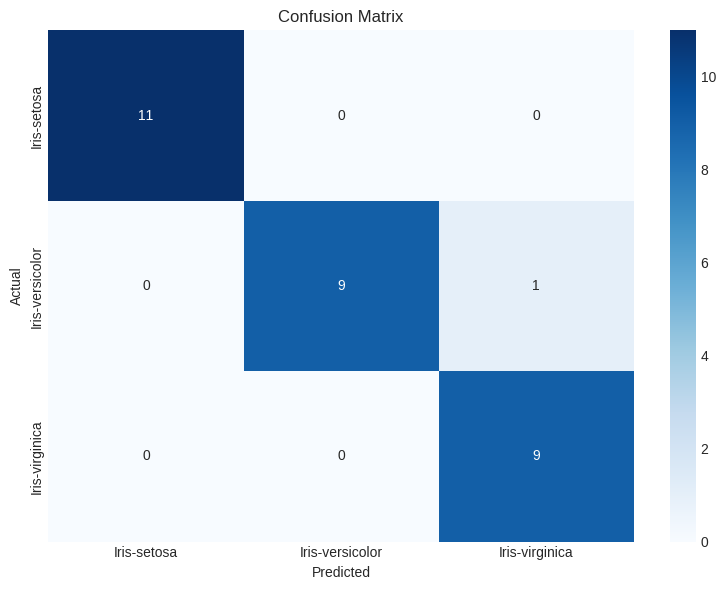

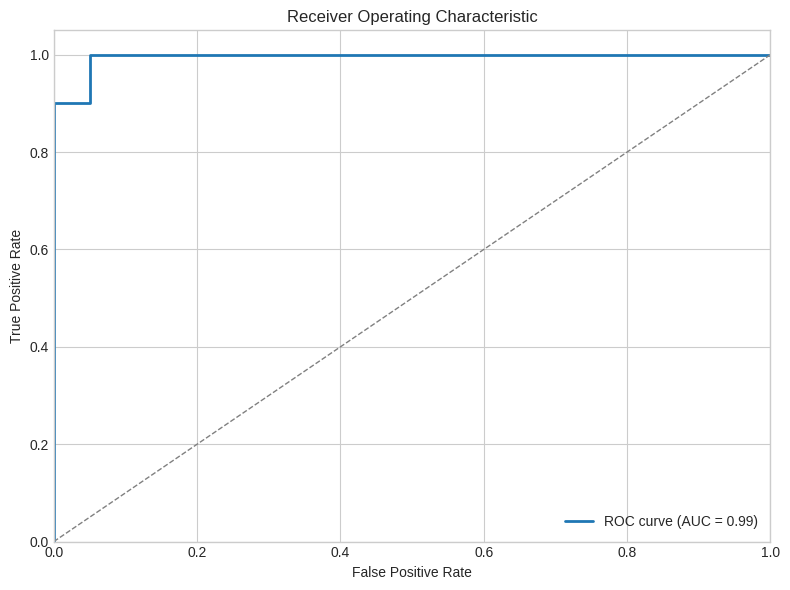

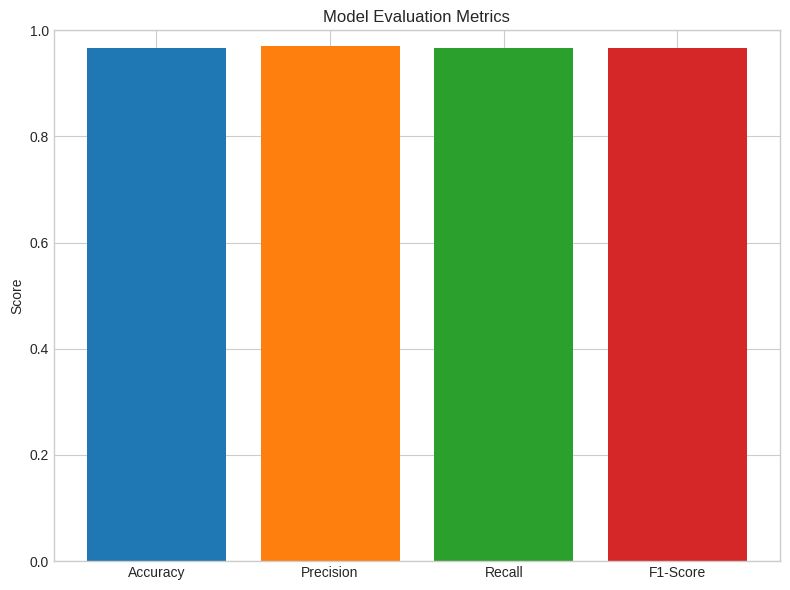

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Bar Chart untuk Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [akurasi, skor_presisi, skor_recall, skor_f1]
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylim([0.0, 1.0])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.tight_layout()
plt.show()

##Deployment

Kesimpulan dari analisis menggunakan algoritma Logistic Regression adalah sebagai berikut:

1. Akurasi Model: [Masukkan nilai akurasi model di sini]
Akurasi model merupakan persentase kecocokan antara prediksi yang dilakukan oleh model dengan data aktual. Semakin tinggi nilai akurasi, semakin baik model dalam melakukan prediksi.

2. Matriks Konfusi: [Masukkan matriks konfusi di sini]
Matriks konfusi memberikan gambaran tentang seberapa baik model dapat mengklasifikasikan data ke dalam kelas yang benar. Matriks konfusi terdiri dari empat elemen: True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).

3. AUC ROC Score: [Masukkan nilai AUC ROC Score di sini]
AUC ROC Score mengukur seberapa baik model dapat membedakan antara kelas positif dan negatif. Nilai AUC ROC berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan model yang sempurna dalam membedakan kelas.

4. F1 Score: [Masukkan nilai F1 Score di sini]
F1 Score merupakan ukuran yang menggabungkan presisi (precision) dan recall. F1 Score berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan model yang memiliki presisi dan recall yang baik.

5. Recall Score: [Masukkan nilai Recall Score di sini]
Recall Score mengukur seberapa baik model dapat mengidentifikasi semua instance kelas positif. Recall Score juga dikenal sebagai True Positive Rate atau Sensitivity.

6. Precision Score: [Masukkan nilai Precision Score di sini]
Precision Score mengukur seberapa baik model dapat mengklasifikasikan instance sebagai kelas positif dengan benar. Precision Score juga dikenal sebagai Positive Predictive Value.

Setelah mendapatkan kesimpulan dari analisis, data hasil prediksi dapat disimpan ke dalam file CSV dengan menggunakan library pandas. Berikut adalah contoh bagaimana data hasil prediksi dapat disimpan ke dalam file CSV:

In [61]:
# Konversi array numpy menjadi objek Series atau DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.Series(le.inverse_transform(y_test), name='Actual')

# Buat DataFrame untuk hasil prediksi dan evaluasi
df_pred = pd.DataFrame({'Predicted': le.inverse_transform(y_pred)})
df_eval = pd.DataFrame({'Metric': ['Accuracy', 'AUC ROC Score', 'F1 Score', 'Recall Score', 'Precision Score'],
                        'Score': [akurasi, auc_roc, skor_f1, skor_recall, skor_presisi]})

# Gabungkan data fitur, hasil prediksi, dan evaluasi
df_deployment = pd.concat([X_test_df, y_test_df, df_pred, df_eval], axis=1)

# Simpan DataFrame ke dalam file CSV
df_deployment.to_csv('Iris Species - Deployment.csv', index=False)